In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem,Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
import warnings
warnings.filterwarnings('ignore')

In [2]:
csv_file = r"C:\Users\intui\Desktop\Coursework\Fall 2022\(24-787) Introduction to Machine Learning and Artificial Intelligence for Engineers\Project\export.csv"
data = pd.read_csv(csv_file)
data

smiles property  value
0                                    [*]CC([*])C      Eat  -5.14
1                                    [*]CC([*])F      Eat  -5.18
2                                 [*]CC([*])(F)F      Eat  -5.21
3                              [*]C(F)C([*])(F)F      Eat  -5.11
4                         [*]CCC(F)(F)C([*])(F)F      Eat  -5.21
...                                          ...      ...    ...
6260  [*]C(F)(F)C(F)(F)C(S1)=CC=C1C(S2)=CC=C2[*]      eps   4.36
6261                  [*]C(F)(F)C(F)(F)C(=O)O[*]      eps   3.31
6262        [*]C(F)(F)C(=O)C(F)(F)C(S1)=CC=C1[*]      eps   4.05
6263      [*]C(F)(F)C(=O)C(F)(F)C(C=C1)=CC=C1[*]      eps   3.57
6264                      [*]C(F)(F)OC(F)(F)O[*]      eps   3.80

[6265 rows x 3 columns]

In [3]:
def canonical(smiles):
    
    a,b = [],[]
    
    for i in smiles:
        a.append(Chem.MolFromSmiles(i))
        
    for j in a:
        b.append(Chem.MolToSmiles(j))
                 
    return b

Fingerprint = canonical(data['smiles'])


In [4]:
data['smiles'] = Fingerprint
data

smiles property  value
0                                 *CC(*)C      Eat  -5.14
1                                 *CC(*)F      Eat  -5.18
2                              *CC(*)(F)F      Eat  -5.21
3                           *C(F)C(*)(F)F      Eat  -5.11
4                      *CCC(F)(F)C(*)(F)F      Eat  -5.21
...                                   ...      ...    ...
6260  *c1ccc(-c2ccc(C(F)(F)C(*)(F)F)s2)s1      eps   4.36
6261               *OC(=O)C(F)(F)C(*)(F)F      eps   3.31
6262       *c1ccc(C(F)(F)C(=O)C(*)(F)F)s1      eps   4.05
6263      *c1ccc(C(F)(F)C(=O)C(*)(F)F)cc1      eps   3.57
6264                   *OC(F)(F)OC(*)(F)F      eps   3.80

[6265 rows x 3 columns]

In [5]:
properties = data.groupby('property').count()
properties

smiles  value
property               
Eat          390    390
Eea          368    368
Egb          561    561
Egc         3380   3380
Ei           370    370
Xc           432    432
eps          382    382
nc           382    382

In [6]:
df1 = data.groupby('property').get_group('Eat').index
df2 = data.groupby('property').get_group('Eea').index
df3 = data.groupby('property').get_group('Egb').index
df4 = data.groupby('property').get_group('Egc').index
df5 = data.groupby('property').get_group('Ei').index
df6 = data.groupby('property').get_group('Xc').index
df7 = data.groupby('property').get_group('eps').index
df8 = data.groupby('property').get_group('nc').index

df3[0], df3[-1]

(4202, 4762)

### Mordred

In [7]:
from mordred import Calculator, descriptors
def morgan_fpts(data):
    Morgan_fpts = []
    for i in data:
        mol = Chem.MolFromSmiles(i) 
        fpts =  AllChem.GetMorganFingerprintAsBitVect(mol,2,2048)
        mfpts = np.array(fpts)
        Morgan_fpts.append(mfpts)  
    return np.array(Morgan_fpts)

In [8]:
Morgan_fpts = morgan_fpts(data['smiles'])

In [9]:
Morgan_fingerprints = pd.DataFrame(Morgan_fpts,columns=['Col_{}'.format(i) for i in range(Morgan_fpts.shape[1])])
Morgan_fingerprints

Col_0  Col_1  Col_2  Col_3  Col_4  Col_5  Col_6  Col_7  Col_8  Col_9  \
0         0      1      0      0      0      0      0      0      0      0   
1         0      1      0      0      0      0      0      0      0      0   
2         0      0      0      0      0      0      0      0      0      0   
3         0      1      0      0      0      0      0      0      0      0   
4         0      0      0      0      0      0      0      0      0      0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
6260      0      0      0      0      0      0      0      0      0      0   
6261      0      0      0      0      0      0      0      0      0      0   
6262      0      0      0      0      0      0      0      0      0      0   
6263      0      0      0      0      0      0      0      0      0      0   
6264      0      0      0      0      0      0      0      0      0      0   

      ...  Col_2038  Col_2039  Col_2040  Col_2041  Col_2042  Col_2043  \
0     ...         0         0         0         0         0         0   
1     ...         0         0         0         0         0         0   
2     ...         0         0         0         0         0         0   
3     ...         0         0         0         0         0         0   
4     ...         0         0         0         0         0         0   
...   ...       ...       ...       ...       ...       ...       ...   
6260  ...         0         0         0         0         0         0   
6261  ...         0         0         0         0         0         0   
6262  ...         0         0         0         0         0         0   
6263  ...         0         0         0         0         0         0   
6264  ...         0         0         0         0         0         0   

      Col_2044  Col_2045  Col_2046  Col_2047  
0            0         0         0         0  
1            0         0         0         0  
2            0         0         0         0  
3            0         0         0         0  
4            0         0         0         0  
...        ...       ...       ...       ...  
6260         0         0         0         0  
6261         0         0         0         0  
6262         0         0         0         0  
6263         0         0         0         0  
6264         0         0         0         0  

[6265 rows x 2048 columns]

In [10]:
def All_Mordred_descriptors(data):
    calc = Calculator(descriptors, ignore_3D=False)
    mols = [Chem.MolFromSmiles(smi) for smi in data]
    
    # pandas df
    df = calc.pandas(mols)
    return df


In [11]:
mordred_descriptors = All_Mordred_descriptors(data['smiles'])
mordred_descriptors

  7%|▋         | 468/6265 [01:07<57:58,  1.67it/s]

C:\Users\intui\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  8%|▊         | 532/6265 [01:19<24:43,  3.87it/s]  

C:\Users\intui\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 11%|█         | 662/6265 [01:43<08:41, 10.75it/s]

C:\Users\intui\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\intui\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\intui\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\intui\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 11%|█         | 688/6265 [01:48<12:32,  7.41it/s]

C:\Users\intui\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 11%|█▏        | 715/6265 [01:58<37:51,  2.44it/s]

C:\Users\intui\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\intui\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\intui\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\intui\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\intui\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████| 6265/6265 [11:35<00:00,  9.01it/s]


ABC      ABCGG  nAcid  nBase    SpAbs_A   SpMax_A  SpDiam_A  \
0      3.047207   3.305183      0      0   5.226252  1.847759  3.695518   
1      3.047207   3.305183      0      0   5.226252  1.847759  3.695518   
2      4.012290   4.284816      0      0   5.818626  2.074313  4.148627   
3      4.876567   5.209852      0      0   6.602720  2.175328  4.350655   
4      7.063820   7.558525      0      0   9.907543  2.343259  4.686518   
...         ...        ...    ...    ...        ...       ...       ...   
6260  14.142228  13.273201      0      0  21.307960  2.474677  4.876137   
6261   7.818707   8.481783      0      0  11.420199  2.393403  4.786805   
6262  11.435146  11.493514      0      0  16.837003  2.449034  4.855714   
6263  12.142253  11.497525      0      0  18.104933  2.435203  4.870405   
6264   7.158554   7.506997      0      0   9.744827  2.264601  4.529203   

         SpAD_A   SpMAD_A   LogEE_A  ...     SRW10     TSRW10          MW  \
0      5.226252  1.045250  2.408576  ...  6.834109  27.254130   42.046950   
1      5.226252  1.045250  2.408576  ...  6.834109  27.254130   46.021878   
2      5.818626  0.969771  2.626363  ...  7.989899  31.665095   64.012457   
3      6.602720  0.943246  2.792781  ...  8.466531  34.219913   82.003035   
4      9.907543  0.990754  3.162641  ...  9.223158  39.914584  128.024913   
...         ...       ...       ...  ...       ...        ...         ...   
6260  21.307960  1.183776  3.827745  ...  9.973433  67.244773  263.969055   
6261  11.420199  1.038200  3.263704  ...  9.447071  41.712231  143.983442   
6262  16.837003  1.122467  3.618692  ...  9.755625  61.091398  209.976249   
6263  18.104933  1.131558  3.675879  ...  9.817548  48.797213  204.019828   
6264   9.744827  0.974483  3.160897  ...  8.957897  39.414536  131.983442   

            AMW  WPath  WPol  Zagreb1  Zagreb2  mZagreb1  mZagreb2  
0      3.822450     18     2     16.0     14.0  3.361111  1.333333  
1      5.752735     18     2     16.0     14.0  3.361111  1.333333  
2      8.001557     28     3     24.0     22.0  4.312500  1.375000  
3     10.250379     42     6     30.0     30.0  5.173611  1.500000  
4      9.144637    115    13     46.0     50.0  6.625000  2.187500  
...         ...    ...   ...      ...      ...       ...       ...  
6260  11.998593    601    27     98.0    116.0  8.069444  3.673611  
6261  13.089404    144    17     52.0     59.0  7.486111  2.395833  
6262  12.351544    343    22     78.0     90.0  8.208333  3.083333  
6263  10.200991    420    25     82.0     94.0  8.458333  3.333333  
6264  13.198344    119     9     46.0     46.0  6.625000  2.125000  

[6265 rows x 1826 columns]

In [12]:
def scale_data(X):
    xmean = X.mean(axis=0)  # average of every column
    xstd = X.std(axis=0)
    data = (X - xmean) / xstd
    return data
df_new = scale_data(mordred_descriptors)
df_new

AATS0Z AATS0are    AATS0d   AATS0dv AATS0i AATS0m AATS0p AATS0pe  \
0    -1.014885      NaN -1.804056 -1.501249    NaN    NaN    NaN     NaN   
1    -0.558195      NaN -1.282183 -0.119697    NaN    NaN    NaN     NaN   
2    -0.058334      NaN -0.064480  1.373350    NaN    NaN    NaN     NaN   
3     0.441526      NaN  0.805308  2.813073    NaN    NaN    NaN     NaN   
4     0.152321      NaN  0.382840  1.822787    NaN    NaN    NaN     NaN   
...        ...      ...       ...       ...    ...    ...    ...     ...   
6260  1.193589      NaN  1.864868  1.415900    NaN    NaN    NaN     NaN   
6261  1.011822      NaN  1.991383  4.354595    NaN    NaN    NaN     NaN   
6262  1.107517      NaN  1.961615  2.373245    NaN    NaN    NaN     NaN   
6263  0.256578      NaN  1.396764  1.938574    NaN    NaN    NaN     NaN   
6264  1.086346      NaN  1.814262  4.626058    NaN    NaN    NaN     NaN   

     AATS0s AATS0se  ...     piPC1    piPC10     piPC2     piPC3     piPC4  \
0       NaN     NaN  ... -2.478630 -1.029592 -2.566030 -2.709493 -2.992088   
1       NaN     NaN  ... -2.478630 -1.029592 -2.566030 -2.709493 -2.992088   
2       NaN     NaN  ... -2.168781 -1.029592 -1.922391 -2.418369 -2.992088   
3       NaN     NaN  ... -1.906807 -1.029592 -1.616811 -1.852060 -2.992088   
4       NaN     NaN  ... -1.300651 -1.029592 -1.061553 -1.150621 -1.536223   
...     ...     ...  ...       ...       ...       ...       ...       ...   
6260    NaN     NaN  ...  0.256553  0.759265  0.516965  0.610029  0.664597   
6261    NaN     NaN  ... -0.990802 -1.029592 -0.737834 -0.693230 -1.073078   
6262    NaN     NaN  ... -0.165698 -1.029592  0.108512  0.213107  0.223635   
6263    NaN     NaN  ... -0.039754 -1.029592  0.193246  0.274595  0.251706   
6264    NaN     NaN  ... -1.300651 -1.029592 -1.061553 -1.491118 -1.198062   

         piPC5     piPC6     piPC7     piPC8     piPC9  
0    -2.379187 -1.875484 -1.708742 -1.490348 -1.141413  
1    -2.379187 -1.875484 -1.708742 -1.490348 -1.141413  
2    -2.379187 -1.875484 -1.708742 -1.490348 -1.141413  
3    -2.379187 -1.875484 -1.708742 -1.490348 -1.141413  
4    -1.577173 -1.875484 -1.708742 -1.490348 -1.141413  
...        ...       ...       ...       ...       ...  
6260  0.567706  0.724878  0.765146  0.848188  0.895096  
6261 -1.577173 -1.875484 -1.708742 -1.490348 -1.141413  
6262  0.111825  0.198759  0.099181 -0.042759 -1.141413  
6263  0.372469  0.361016  0.329756  0.287870  0.129067  
6264 -1.577173 -1.875484 -1.708742 -1.490348 -1.141413  

[6265 rows x 1826 columns]

In [13]:
Y_global = pd.DataFrame(data.value)
df_new = df_new.dropna(axis = 1, how = 'all')
X_global = df_new
display(X_global, Y_global)

AATS0Z    AATS0d   AATS0dv    AATS1Z    AATS1d   AATS1dv    AATS2Z  \
0    -1.014885 -1.804056 -1.501249 -2.137277 -1.963343 -1.832955 -1.921936   
1    -0.558195 -1.282183 -0.119697 -1.504494 -1.197425 -0.925938 -1.684723   
2    -0.058334 -0.064480  1.373350 -0.567037 -0.285617  0.695299 -0.643298   
3     0.441526  0.805308  2.813073  0.370420  0.990914  1.790730 -0.157300   
4     0.152321  0.382840  1.822787  0.045916  0.668274  1.194142  0.189841   
...        ...       ...       ...       ...       ...       ...       ...   
6260  1.193589  1.864868  1.415900  2.021159  1.855149  1.047107  1.895401   
6261  1.011822  1.991383  4.354595  1.635987  2.504515  3.780032  2.042708   
6262  1.107517  1.961615  2.373245  1.886894  2.031447  1.902421  1.732141   
6263  0.256578  1.396764  1.938574  0.569630  1.483290  1.725004  0.727910   
6264  1.086346  1.814262  4.626058  1.854727  1.497474  4.161729  2.766126   

        AATS2d   AATS2dv   AATSC0Z  ...     piPC1    piPC10     piPC2  \
0    -1.912517 -1.413093 -0.580050  ... -2.478630 -1.029592 -2.566030   
1    -2.018645 -1.146142 -0.151991  ... -2.478630 -1.029592 -2.566030   
2    -1.700262  0.181588  0.110263  ... -2.168781 -1.029592 -1.922391   
3    -1.381880  1.066741  0.197681  ... -1.906807 -1.029592 -1.616811   
4    -0.745115  1.235342  0.050497  ... -1.300651 -1.029592 -1.061553   
...        ...       ...       ...  ...       ...       ...       ...   
6260  1.248965  1.314096  0.551326  ...  0.256553  0.759265  0.516965   
6261  0.448819  4.343916 -0.159577  ... -0.990802 -1.029592 -0.737834   
6262  1.074213  2.213828  0.276175  ... -0.165698 -1.029592  0.108512   
6263  0.769614  1.900165 -0.214058  ... -0.039754 -1.029592  0.193246   
6264 -0.426733  5.820676 -0.069818  ... -1.300651 -1.029592 -1.061553   

         piPC3     piPC4     piPC5     piPC6     piPC7     piPC8     piPC9  
0    -2.709493 -2.992088 -2.379187 -1.875484 -1.708742 -1.490348 -1.141413  
1    -2.709493 -2.992088 -2.379187 -1.875484 -1.708742 -1.490348 -1.141413  
2    -2.418369 -2.992088 -2.379187 -1.875484 -1.708742 -1.490348 -1.141413  
3    -1.852060 -2.992088 -2.379187 -1.875484 -1.708742 -1.490348 -1.141413  
4    -1.150621 -1.536223 -1.577173 -1.875484 -1.708742 -1.490348 -1.141413  
...        ...       ...       ...       ...       ...       ...       ...  
6260  0.610029  0.664597  0.567706  0.724878  0.765146  0.848188  0.895096  
6261 -0.693230 -1.073078 -1.577173 -1.875484 -1.708742 -1.490348 -1.141413  
6262  0.213107  0.223635  0.111825  0.198759  0.099181 -0.042759 -1.141413  
6263  0.274595  0.251706  0.372469  0.361016  0.329756  0.287870  0.129067  
6264 -1.491118 -1.198062 -1.577173 -1.875484 -1.708742 -1.490348 -1.141413  

[6265 rows x 559 columns]

value
0     -5.14
1     -5.18
2     -5.21
3     -5.11
4     -5.21
...     ...
6260   4.36
6261   3.31
6262   4.05
6263   3.57
6264   3.80

[6265 rows x 1 columns]

## Machine Learning Model - Support Vector Regression

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
import matplotlib.pyplot as plt

### Property EGC

In [15]:
x_EGC = X_global.iloc[df4[0]:df4[-1] + 1]
y_EGC = Y_global.iloc[df4[0]:df4[-1] + 1]
display(x_EGC, y_EGC)

AATS0Z    AATS0d   AATS0dv    AATS1Z    AATS1d   AATS1dv    AATS2Z  \
822  -1.153029 -2.360720 -1.602079 -3.203634 -2.473955 -2.109004 -2.379005   
823  -1.014885 -1.804056 -1.501249 -2.137277 -1.963343 -1.832955 -1.921936   
824  -0.990217 -1.804056 -1.498479 -1.973222 -1.786593 -1.778689 -1.775847   
825  -0.974255 -1.804056 -1.496687 -1.870688 -1.755907 -1.763943 -1.688194   
826  -0.963082 -1.664890 -1.474103 -1.800532 -1.734911 -1.721567 -1.557437   
...        ...       ...       ...       ...       ...       ...       ...   
4197 -0.568906 -0.114182 -0.492958 -0.791636 -0.194436 -0.312497 -0.640819   
4198 -0.899057 -1.507958 -1.445967 -1.456092 -1.641435 -1.655591 -1.302867   
4199 -0.899229 -1.579594 -1.456214 -1.448784 -1.636886 -1.666522 -1.311546   
4200 -0.899379 -1.642235 -1.465175 -1.442456 -1.632947 -1.675986 -1.318984   
4201 -0.385743 -0.621144 -1.205381  0.118479 -0.846379 -1.286822 -0.365585   

        AATS2d   AATS2dv   AATSC0Z  ...     piPC1    piPC10     piPC2  \
822  -2.973792 -1.441193 -0.629293  ... -3.346760 -1.029592 -3.820829   
823  -1.912517 -1.413093 -0.580050  ... -2.478630 -1.029592 -2.566030   
824  -1.806390 -1.367430 -0.577485  ... -2.168781 -1.029592 -2.316353   
825  -1.700262 -1.340032 -0.576830  ... -1.906807 -1.029592 -2.105253   
826  -1.417256 -1.314742 -0.576843  ... -1.679875 -1.029592 -1.761095   
...        ...       ...       ...  ...       ...       ...       ...   
4197  0.058422 -0.357332 -0.411569  ... -0.854772 -1.029592 -0.568553   
4198 -1.148399 -1.266972 -0.550358  ... -0.398867 -0.473917 -0.537071   
4199 -1.233301 -1.268377 -0.558471  ...  0.039305 -0.234130 -0.256618   
4200 -1.306075 -1.269581 -0.565607  ...  0.566402 -0.085401  0.098765   
4201 -0.019910 -0.917048 -0.044686  ...  0.114849  0.161546  0.364649   

         piPC3     piPC4     piPC5     piPC6     piPC7     piPC8     piPC9  
822  -3.821246 -2.992088 -2.379187 -1.875484 -1.708742 -1.490348 -1.141413  
823  -2.709493 -2.992088 -2.379187 -1.875484 -1.708742 -1.490348 -1.141413  
824  -2.192557 -2.473499 -2.379187 -1.875484 -1.708742 -1.490348 -1.141413  
825  -2.008054 -1.954909 -1.978180 -1.875484 -1.708742 -1.490348 -1.141413  
826  -1.852060 -1.651553 -1.743606 -1.875484 -1.708742 -1.490348 -1.141413  
...        ...       ...       ...       ...       ...       ...       ...  
4197 -0.275277 -0.074653  0.158207 -0.050864 -0.517853 -1.490348 -1.141413  
4198 -0.954143 -0.917729 -0.812496 -0.514986 -0.683102 -0.595697 -0.497734  
4199 -0.693230 -0.714277 -0.646063 -0.489536 -0.472457 -0.389525 -0.150468  
4200 -0.379365 -0.472789 -0.451403 -0.324133 -0.315172 -0.239679 -0.039168  
4201  0.452447  0.570013  0.667127  0.718499  0.710749  0.408661  0.354779  

[3380 rows x 559 columns]

value
822   6.8972
823   6.5196
824   6.5170
825   6.7336
826   6.7394
...      ...
4197  3.3666
4198  0.2161
4199  0.1032
4200  0.1771
4201  2.2084

[3380 rows x 1 columns]

In [16]:
support_vector_regressor_EGC = SVR(kernel = 'rbf')
support_vector_regressor_EGC.fit(x_EGC, y_EGC)
y_EGC_pred = support_vector_regressor_EGC.predict(x_EGC)

result_EGC = x_EGC
result_EGC['value'] = y_EGC
result_EGC['prediction'] = y_EGC_pred.tolist()
result_EGC.head()

AATS0Z    AATS0d   AATS0dv    AATS1Z    AATS1d   AATS1dv    AATS2Z  \
822 -1.153029 -2.360720 -1.602079 -3.203634 -2.473955 -2.109004 -2.379005   
823 -1.014885 -1.804056 -1.501249 -2.137277 -1.963343 -1.832955 -1.921936   
824 -0.990217 -1.804056 -1.498479 -1.973222 -1.786593 -1.778689 -1.775847   
825 -0.974255 -1.804056 -1.496687 -1.870688 -1.755907 -1.763943 -1.688194   
826 -0.963082 -1.664890 -1.474103 -1.800532 -1.734911 -1.721567 -1.557437   

       AATS2d   AATS2dv   AATSC0Z  ...     piPC2     piPC3     piPC4  \
822 -2.973792 -1.441193 -0.629293  ... -3.820829 -3.821246 -2.992088   
823 -1.912517 -1.413093 -0.580050  ... -2.566030 -2.709493 -2.992088   
824 -1.806390 -1.367430 -0.577485  ... -2.316353 -2.192557 -2.473499   
825 -1.700262 -1.340032 -0.576830  ... -2.105253 -2.008054 -1.954909   
826 -1.417256 -1.314742 -0.576843  ... -1.761095 -1.852060 -1.651553   

        piPC5     piPC6     piPC7     piPC8     piPC9   value  prediction  
822 -2.379187 -1.875484 -1.708742 -1.490348 -1.141413  6.8972    5.582617  
823 -2.379187 -1.875484 -1.708742 -1.490348 -1.141413  6.5196    6.292778  
824 -2.379187 -1.875484 -1.708742 -1.490348 -1.141413  6.5170    6.142053  
825 -1.978180 -1.875484 -1.708742 -1.490348 -1.141413  6.7336    6.330639  
826 -1.743606 -1.875484 -1.708742 -1.490348 -1.141413  6.7394    6.467486  

[5 rows x 561 columns]

In [17]:
R2_EGC = r2_score(y_EGC, y_EGC_pred)
print('R^2 of Chain Band Gap:', R2_EGC)

RMSE_EGC = np.sqrt(mean_squared_error(y_EGC, y_EGC_pred))
print('RMSE of Chain Band Gap:', RMSE_EGC)

R^2 of Chain Band Gap: 0.8944828259987185
RMSE of Chain Band Gap: 0.5076858493890435


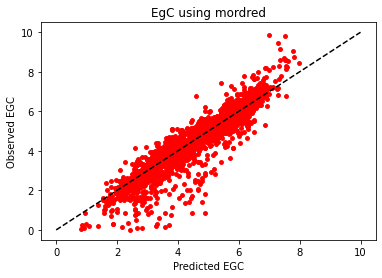

In [37]:
plt.scatter(y_EGC_pred, y_EGC, c = "r", s = 15)
plt.plot([0, 10], [0, 10] ,"k--")
plt.xlabel('Predicted EGC')
plt.ylabel('Observed EGC')
plt.title("EgC using mordred");

### Cross Validation - EGC

In [19]:
X_EGC_train, X_EGC_test, Y_EGC_train, Y_EGC_test = train_test_split(x_EGC, y_EGC, test_size = 0.3)
  
SVR_EGC = SVR()

SVR_EGC.fit(X_EGC_train, Y_EGC_train) 

scores_EGC = cross_val_score(SVR_EGC, X_EGC_train, Y_EGC_train , cv = 5, scoring = 'neg_mean_squared_error')

Y_EGC_pred_test = SVR_EGC.predict(X_EGC_test)
# type(Y_EPS_test)
# Y_EPS_pred_train = SVR_EPS.predict(X_EPS_train)

result1_EGC = X_EGC_test
result1_EGC['value'] = Y_EGC_test
result1_EGC['prediction'] = Y_EGC_pred_test.tolist()
RMSE_EGC_CV = np.sqrt(np.absolute(min(scores_EGC)))
print('RMSE of Crystalization Tendency after Cross Validation is:', RMSE_EGC_CV)

RMSE of Crystalization Tendency after Cross Validation is: 0.49097928630657806


### Hyperparameter Tuning - EGC

In [20]:
SVR_EGC_HYP = SVR()
params_EGC = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

grid_EGC = GridSearchCV(SVR_EGC_HYP, params_EGC, refit = True, verbose = 3)

grid_EGC.fit(X_EGC_train, Y_EGC_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.001 total time=   5.3s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.011 total time=   4.5s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.007 total time=   5.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.004 total time=   4.8s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.016 total time=   4.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.021 total time=   4.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.009 total time=   4.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.014 total time=   4.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.015 total time=   7.7s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.001 total time=   4.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.453 total time=   4.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.005 total time=   4.2s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.009 total time=   4.1s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.005 total time=   3.9s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.005 total time=   4.1s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.149 total time=   4.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.147 total time=   4.5s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.168 total time=   4.5s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.159 total time=   8.6s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.139 total time=   4.8s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.743 total time=   3.4s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.745 total time=   2.5s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.763 total time=   3.3s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [21]:
print(grid_EGC.best_params_)
print(grid_EGC.best_estimator_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVR(C=1000, gamma=0.0001)


In [22]:
grid_predictions_EGC = grid_EGC.predict(X_EGC_test)
grid_predictions_full_EGC = grid_EGC.predict(x_EGC)

In [23]:
R2_EGC_tuned = r2_score(Y_EGC_test, grid_predictions_EGC)
print('R^2 of Chain Band Gap after Tuning:', R2_EGC_tuned)

RMSE_EGC_tuned = np.sqrt(mean_squared_error(Y_EGC_test, grid_predictions_EGC))
print('RMSE of Chain Band Gap after Tuning:', RMSE_EGC_tuned)

R^2 of Chain Band Gap after Tuning: 0.996053973867151
RMSE of Chain Band Gap after Tuning: 0.0976614958363181


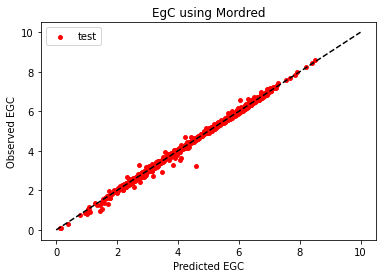

In [36]:
plt.scatter(grid_predictions_EGC, Y_EGC_test, c = "r", s = 15, label = 'test')
plt.plot([0, 10], [0, 10] ,"k--")
plt.xlabel('Predicted EGC')
plt.ylabel('Observed EGC')
plt.title("EgC using Mordred")
plt.legend();

### Property XC

In [25]:
x_XC = X_global.iloc[df6[0]:df6[-1] + 1]
y_XC = Y_global.iloc[df6[0]:df6[-1] + 1]
display(x_XC, y_XC)

AATS0Z    AATS0d   AATS0dv    AATS1Z    AATS1d   AATS1dv    AATS2Z  \
390 -1.153029 -2.360720 -1.602079 -3.203634 -2.473955 -2.109004 -2.379005   
391 -1.014885 -1.804056 -1.501249 -2.137277 -1.963343 -1.832955 -1.921936   
392 -0.990217 -1.804056 -1.498479 -1.973222 -1.786593 -1.778689 -1.775847   
393 -0.974255 -1.804056 -1.496687 -1.870688 -1.755907 -1.763943 -1.688194   
394 -0.963082 -1.664890 -1.474103 -1.800532 -1.734911 -1.721567 -1.557437   
..        ...       ...       ...       ...       ...       ...       ...   
817  0.446525  0.979266  3.090353  0.077465  0.079106  2.185085 -0.990440   
818 -0.908097 -1.804056 -1.310579 -1.824081 -1.777666 -1.523446 -1.690508   
819 -0.298699 -0.292128 -0.423454  0.069229 -0.474570 -0.356549 -0.281470   
820 -0.332194 -0.234736 -0.446681 -0.005690 -0.394658 -0.350191 -0.292935   
821 -0.499503 -0.740764 -0.363545 -0.542298 -0.700996 -0.394776 -0.604327   

       AATS2d   AATS2dv   AATSC0Z  ...     piPC1    piPC10     piPC2  \
390 -2.973792 -1.441193 -0.629293  ... -3.346760 -1.029592 -3.820829   
391 -1.912517 -1.413093 -0.580050  ... -2.478630 -1.029592 -2.566030   
392 -1.806390 -1.367430 -0.577485  ... -2.168781 -1.029592 -2.316353   
393 -1.700262 -1.340032 -0.576830  ... -1.906807 -1.029592 -2.105253   
394 -1.417256 -1.314742 -0.576843  ... -1.679875 -1.029592 -1.761095   
..        ...       ...       ...  ...       ...       ...       ...   
817 -2.973792  0.624165  0.377762  ... -2.478630 -1.029592 -2.105253   
818 -1.841766 -1.272592 -0.523518  ... -1.906807 -1.029592 -2.105253   
819 -0.150653 -0.306184 -0.208411  ...  1.715818  1.383119  1.515730   
820 -0.053062 -0.308776 -0.252172  ...  2.006355  1.468012  1.774645   
821 -0.642992 -0.391415 -0.392697  ...  1.657210  1.146402  1.281261   

        piPC3     piPC4     piPC5     piPC6     piPC7     piPC8     piPC9  
390 -3.821246 -2.992088 -2.379187 -1.875484 -1.708742 -1.490348 -1.141413  
391 -2.709493 -2.992088 -2.379187 -1.875484 -1.708742 -1.490348 -1.141413  
392 -2.192557 -2.473499 -2.379187 -1.875484 -1.708742 -1.490348 -1.141413  
393 -2.008054 -1.954909 -1.978180 -1.875484 -1.708742 -1.490348 -1.141413  
394 -1.852060 -1.651553 -1.743606 -1.875484 -1.708742 -1.490348 -1.141413  
..        ...       ...       ...       ...       ...       ...       ...  
817 -3.821246 -2.992088 -2.379187 -1.875484 -1.708742 -1.490348 -1.141413  
818 -1.852060 -1.787960 -1.743606 -1.875484 -1.708742 -1.490348 -1.141413  
819  1.234030  1.097749  1.095943  1.049144  1.107518  1.230240  1.307388  
820  1.450554  1.271543  1.238013  1.154201  1.208351  1.335672  1.388976  
821  1.019286  0.858009  0.869501  0.845512  0.882523  0.946608  1.086072  

[432 rows x 559 columns]

value
390  47.80
391  44.47
392  34.04
393  20.01
394  21.64
..     ...
817  31.84
818  25.58
819  29.05
820  21.74
821   7.55

[432 rows x 1 columns]

In [26]:
support_vector_regressor_XC = SVR(kernel = 'rbf')
support_vector_regressor_XC.fit(x_XC, y_XC)
y_XC_pred = support_vector_regressor_XC.predict(x_XC)

result_XC = x_XC
result_XC['value'] = y_XC
result_XC['prediction'] = y_XC_pred.tolist()
result_XC.head()

AATS0Z    AATS0d   AATS0dv    AATS1Z    AATS1d   AATS1dv    AATS2Z  \
390 -1.153029 -2.360720 -1.602079 -3.203634 -2.473955 -2.109004 -2.379005   
391 -1.014885 -1.804056 -1.501249 -2.137277 -1.963343 -1.832955 -1.921936   
392 -0.990217 -1.804056 -1.498479 -1.973222 -1.786593 -1.778689 -1.775847   
393 -0.974255 -1.804056 -1.496687 -1.870688 -1.755907 -1.763943 -1.688194   
394 -0.963082 -1.664890 -1.474103 -1.800532 -1.734911 -1.721567 -1.557437   

       AATS2d   AATS2dv   AATSC0Z  ...     piPC2     piPC3     piPC4  \
390 -2.973792 -1.441193 -0.629293  ... -3.820829 -3.821246 -2.992088   
391 -1.912517 -1.413093 -0.580050  ... -2.566030 -2.709493 -2.992088   
392 -1.806390 -1.367430 -0.577485  ... -2.316353 -2.192557 -2.473499   
393 -1.700262 -1.340032 -0.576830  ... -2.105253 -2.008054 -1.954909   
394 -1.417256 -1.314742 -0.576843  ... -1.761095 -1.852060 -1.651553   

        piPC5     piPC6     piPC7     piPC8     piPC9  value  prediction  
390 -2.379187 -1.875484 -1.708742 -1.490348 -1.141413  47.80   33.293159  
391 -2.379187 -1.875484 -1.708742 -1.490348 -1.141413  44.47   38.739063  
392 -2.379187 -1.875484 -1.708742 -1.490348 -1.141413  34.04   38.659087  
393 -1.978180 -1.875484 -1.708742 -1.490348 -1.141413  20.01   38.386254  
394 -1.743606 -1.875484 -1.708742 -1.490348 -1.141413  21.64   36.599409  

[5 rows x 561 columns]

In [27]:
R2_XC = r2_score(y_XC, y_XC_pred)
print('R^2 of Crystallization Tendency:', R2_XC)

RMSE_XC = np.sqrt(mean_squared_error(y_XC, y_XC_pred))
print('RMSE of Crystallization Tendency:', RMSE_XC)

R^2 of Crystallization Tendency: 0.11608154614384791
RMSE of Crystallization Tendency: 22.287559480532913


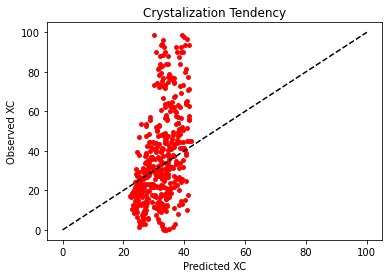

In [28]:
plt.scatter(y_XC_pred, y_XC, c = "r", s = 15)
plt.plot([0, 100], [0, 100] ,"k--")
plt.xlabel('Predicted XC')
plt.ylabel('Observed XC')
plt.title("Crystalization Tendency");

### Cross Validation - XC

In [29]:
X_XC_train, X_XC_test, Y_XC_train, Y_XC_test = train_test_split(x_XC, y_XC, test_size = 0.3)
  
SVR_XC = SVR()
  
SVR_XC.fit(X_XC_train, Y_XC_train) 

scores_XC = cross_val_score(SVR_XC, X_XC_train, Y_XC_train , cv = 5, scoring = 'neg_mean_squared_error')

Y_XC_pred_test = SVR_XC.predict(X_XC_test)
# type(Y_EPS_test)
# Y_EPS_pred_train = SVR_EPS.predict(X_EPS_train)

result1_XC = X_XC_test
result1_XC['value'] = Y_XC_test
result1_XC['prediction'] = Y_XC_pred_test.tolist()
RMSE_XC_CV = np.sqrt(np.absolute(min(scores_XC)))
print('RMSE of Crystalization Tendency after Cross Validation is:', RMSE_XC_CV)

RMSE of Crystalization Tendency after Cross Validation is: 10.52995847618774


### Hyperparameter Tuning - XC

In [30]:
SVR_XC_HYP = SVR()
params_XC = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

grid_XC = GridSearchCV(SVR_XC_HYP, params_XC, refit = True, verbose = 3)

grid_XC.fit(X_XC_train, Y_XC_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.053 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.000 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.164 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.105 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.027 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.053 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.000 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.164 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.105 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.027 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.040 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [31]:
print(grid_XC.best_params_)
print(grid_XC.best_estimator_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVR(C=100, gamma=0.0001)


In [32]:
grid_predictions_XC = grid_XC.predict(X_XC_test)
grid_predictions_full_XC = grid_XC.predict(x_XC)

In [33]:
R2_XC_tuned = r2_score(Y_XC_test, grid_predictions_XC)
print('R^2 of Crystallization Tendency after Tuning:', R2_XC_tuned)

RMSE_XC_tuned = np.sqrt(mean_squared_error(Y_XC_test, grid_predictions_XC))
print('RMSE of Crystalization Tendency after Tuning:', RMSE_XC_tuned)

R^2 of Crystallization Tendency after Tuning: 0.9862878791960535
RMSE of Crystalization Tendency after Tuning: 2.649338412373326


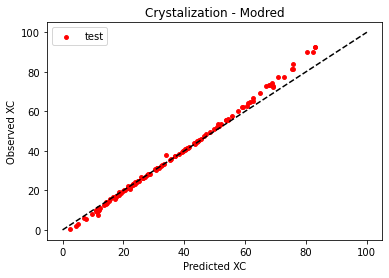

In [34]:
plt.scatter(grid_predictions_XC, Y_XC_test, c = "r", s = 15, label = 'test')
plt.plot([0, 100], [0, 100] ,"k--")
plt.xlabel('Predicted XC')
plt.ylabel('Observed XC')
plt.title("Crystalization - Mordred")
plt.legend();